# 4.6 Lab: Classification  

## 4.6.1 The Stock Market Data <a name='stockdata'></a>

We will begin by examining some numerical and graphical summaries of the `Smarket` data, which is part of the `ISLR` library. This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was *Up* or *Down* on this date).

In [1]:
library(ISLR)
?Smarket

Smarket {ISLR},R Documentation


In [2]:
# check number of observations
dim(Smarket)

[1] 1250    9

In [3]:
# review summary statistics
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

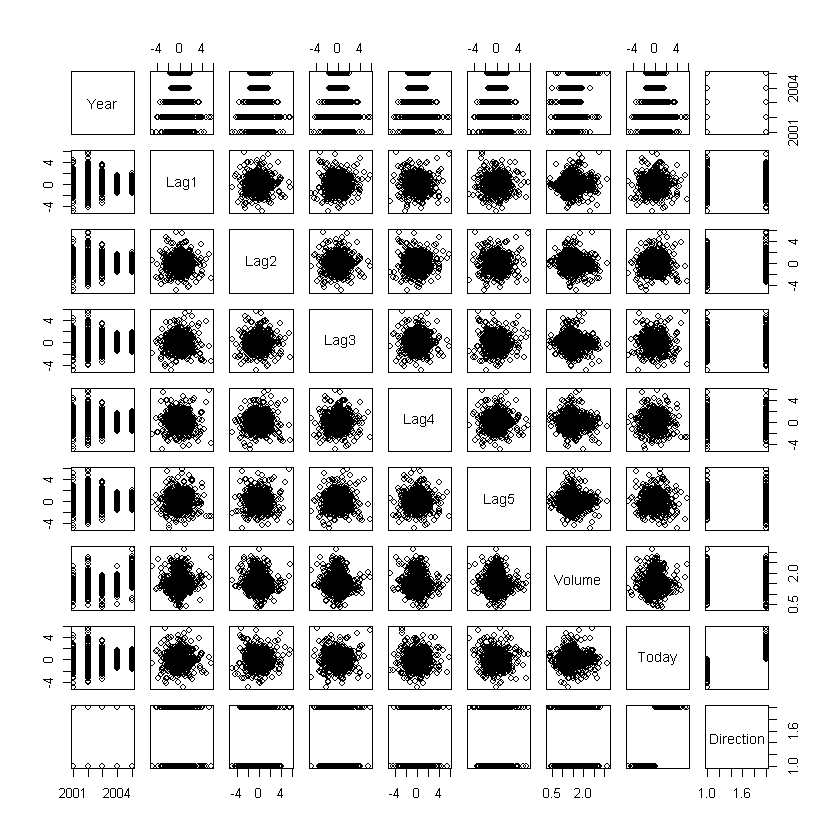

In [4]:
# check correlations visually
pairs(Smarket)

The `cor()` function produces a matrix that contains all of the pairwise correlations among the predictors in a data set. The first command below gives an error message because the `Direction` variable is qualitative.

In [5]:
cor(Smarket [,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


As one would expect, the correlations between the lag variables and today’s returns are close to zero. In other words, there appears to be little correlation between today’s returns and previous days’ returns. The only substantial correlation is between Year and Volume . By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

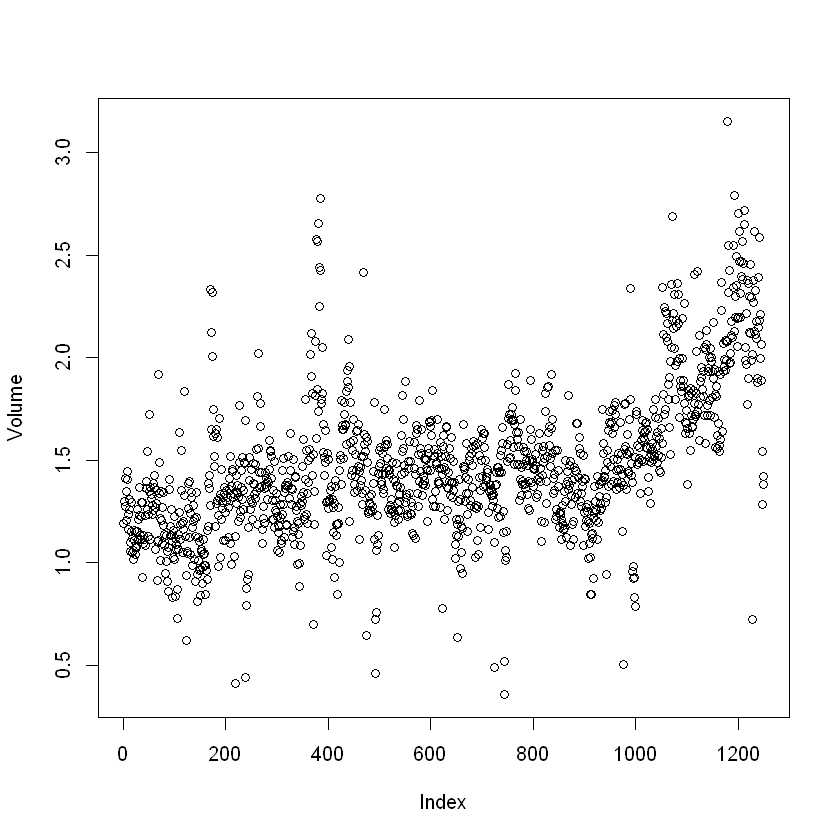

In [6]:
attach(Smarket)
plot(Volume)

## 4.6.2 Logistic Regression <a name='log'></a>

Next, we will fit a logistic regression model in order to predict Direction using `Lag1` through `Lag`5 and `Volume`. The `glm()` function fits generalized linear models, a class of models that includes logistic regression. The syntax of the `glm()` function is similar to that of `lm()`, except that we must pass in the argument `family=binomial` in order to tell `R` to run a logistic regression rather than some other type of generalized linear model.

In [7]:
glm.fit=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with `Lag1`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between `Lag1` and `Direction`. We use the `coef()` function in order to access just the coefficients for this fitted model. We can also use the `summary()` function to access particular aspects of the fitted model, such as the p-values for the coefficients.

In [8]:
# coef(glm.fit) # same as below
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


The `predict()` function can be used to predict the probability that the market will go up, given values of the predictors. The `type="response"` option tells `R` to output probabilities of the form `P(Y = 1|X)`, as opposed to other information such as the `logit`. If no data set is supplied to the `predict()` function, then the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. We know that these values correspond to the probability of the market going up, rather than down, because the `contrasts()` function indicates that `R` has created a dummy variable with a 1 for `Up`.

In [9]:
glm.probs=predict(glm.fit,type="response")
print(glm.probs[1:10])

        1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378 


In [10]:
contrasts(Direction)

,Up
Down,0
Up,1


In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `Up` or `Down`. The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [11]:
glm.pred=rep("Down",1250)
glm.pred[glm.probs >.5]="Up"

The first command creates a vector of 1,250 `Down` elements. The second line transforms to Up all of the elements for which the predicted probability of a
market increase exceeds 0.5. Given these predictions, the `table()` function `table()` can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classified.

In [12]:
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [13]:
(507+145) / 1250
mean(glm.pred==Direction )

[1] 0.5216

[1] 0.5216

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. The `mean()` function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market 52.2% of the time. 

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1,250 observations. In other words, 100−52.2 = 47.8% is the *training error rate*. As we have seen previously, the training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in practice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [14]:
train=(Year<2005)
Smarket.2005 = Smarket[!train,]
print(dim(Smarket.2005))
Direction.2005 = Direction[!train]

[1] 252   9


The object train is a vector of 1,250 elements, corresponding to the observations in our data set. The elements of the vector that correspond to observations that occurred before 2005 are set to `TRUE`, whereas those that correspond to observations in 2005 are set to `FALSE`. The object *train* is
a Boolean vector, since its elements are `TRUE` and `FALSE`. Boolean vectors can be used to obtain a subset of the rows or columns of a matrix. For instance, the command `Smarket[train,]` would pick out a submatrix of the stock market data set, corresponding only to the dates before 2005, since those are the ones for which the elements of train are `TRUE`. The `!` symbol can be used to reverse all of the elements of a Boolean vector. That is, `!train` is a vector similar to `train`, except that the elements that are `TRUE` in train get swapped to FALSE in !train , and the elements that are FALSE in `train` get swapped to `TRUE` in `!train`. Therefore, `Smarket[!train,]` yields a submatrix of the stock market data containing only the observations for which `train` is `FALSE` — that is, the observations with dates in 2005. The output above indicates that there are 252 such observations.

We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005, using the `subset` argument. We then obtain predicted probabilities of the stock market going up for each of the days in our test set—that is, for the days in 2005.

In [15]:
glm.fit=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.probs=predict(glm.fit, Smarket.2005, type="response")

Notice that we have trained and tested our model on two completely separate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005. Finally, we compute the predictions for 2005 and compare them to the actual movements of the market over that time period.

In [16]:
glm.pred=rep("Down", 252)
glm.pred[glm.probs>0.5] = "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [17]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

In [18]:
mean(glm.pred!=Direction.2005)

[1] 0.5198413

The `!=` notation means *not equal to*, and so the last command computes the test set error rate. The results are rather disappointing: the test error
rate is 52%, which is worse than random guessing! Of course this result is not all that surprising, given that one would not generally expect to be
able to use previous days’ returns to predict future market performance. (After all, if it were possible to do so, then the authors of this book would
be out striking it rich rather than writing a statistics textbook.)

We recall that the logistic regression model had very underwhelming p-values associated with all of the predictors, and that the smallest p-value,
though not very small, corresponded to `Lag1`. Perhaps by removing the variables that appear not to be helpful in predicting `Direction`, we can
obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test
error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in
turn yield an improvement. Below we have refit the logistic regression using just `Lag1` and `Lag2`, which seemed to have the highest predictive power in
the original logistic regression model.

In [19]:
glm.fit=glm(Direction∼Lag1+Lag2,data=Smarket, family=binomial, subset=train)
glm.probs=predict(glm.fit, Smarket.2005, type="response")
glm.pred=rep("Down", 252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred, Direction.2005)
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

In [20]:
106/(106+76)

[1] 0.5824176

Now the results appear to be a little better: 56% of the daily movements have been correctly predicted. It is worth noting that in this case, a much
simpler strategy of predicting that the market will increase every day will also be correct 56% of the time! Hence, in terms of overall error rate, the
logistic regression method is no better than the na¨ıve approach. However, the confusion matrix shows that on days when logistic regression predicts
an increase in the market, it has a 58% accuracy rate. This suggests a possible trading strategy of buying on days when the model predicts an in-
creasing market, and avoiding trades on days when a decrease is predicted. Of course one would need to investigate more carefully whether this small
improvement was real or just due to random chance.

Suppose that we want to predict the returns associated with particular values of `Lag1` and `Lag2`. In particular, we want to predict `Direction` on a
day when `Lag1` and `Lag2` equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8. We do this using the `predict()` function.

In [21]:
predict(glm.fit, newdata=data.frame(Lag1=c(1.2,1.5), Lag2=c(1.1,-0.8)), type="response")

1         2 
0.4791462 0.4960939

## 4.6.3 Linear Discriminant Analysis

Now we will perform LDA on the `Smarket` data. In `R`, we fit a LDA model using the `lda()` function, which is part of the MASS library. Notice that the syntax for the `lda()` function is identical to that of `lm()`, and to that of `glm()` except for the absence of the family option. We fit the model using only the observations before 2005.

In [22]:
library(MASS)
lda.fit=lda(Direction∼Lag1+Lag2, data=Smarket, subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

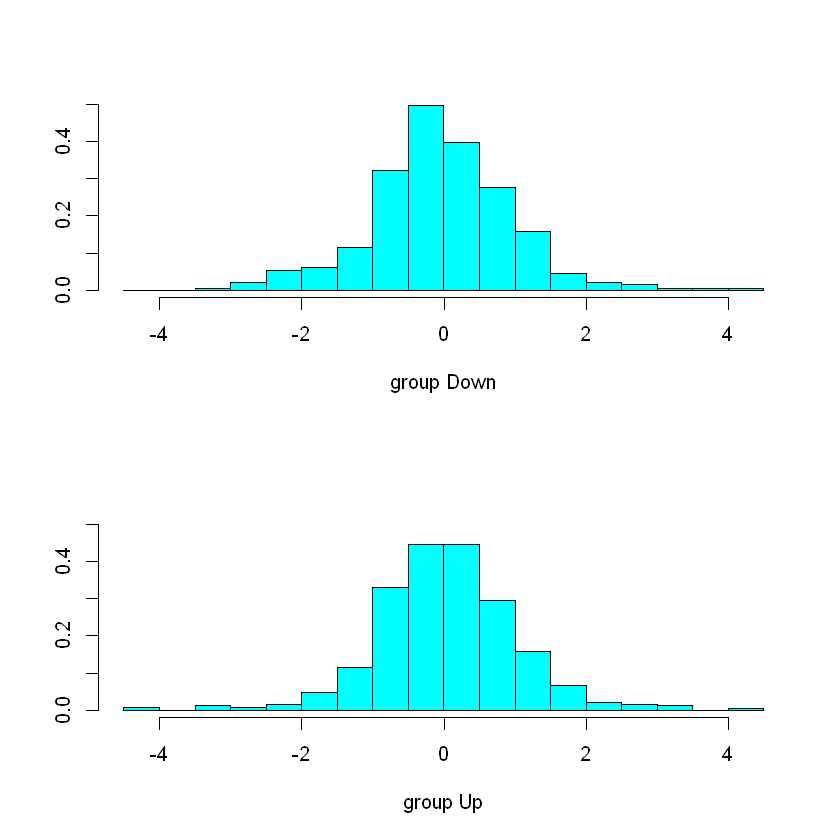

In [23]:
plot(lda.fit)

The LDA output indicates that $\hat{\pi}_1 = 0.492$ and $\hat{\pi}_1 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down. It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates $\mu_k$. These suggest that there is a tendency for the previous 2 days' returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines. The *coefficients of linear discriminants* output provides the linear combination of `Lag1` and `Lag2` that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of $X = x $ in (4.19). If −0.642×`Lag1`−0.514×`Lag2` is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The `plot()` function produces plots of the linear discriminants, obtained by computing −0.642 × `Lag1` − 0.514 × `Lag2` for each of the training observations.

The `predict()` function returns a list with three elements. The first element, `class`, contains LDA’s predictions about the movement of the market.
The second element, `posterior`, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the k-th
class, computed from (4.10). Finally, `x` contains the linear discriminants, described earlier.

In [24]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

As we observed in Section 4.5, the LDA and logistic regression predictions are almost identical.

In [25]:
lda.class=lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class==Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions contained in `lda.pred$class`

In [26]:
sum(lda.pred$posterior[,1]>=.5)
sum(lda.pred$posterior[,1]<.5)

[1] 70

[1] 182

Notice that the posterior probability output by the model corresponds to the probability that the market will decrease:

In [27]:
print(lda.pred$posterior[1:20,1])

      999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331 


In [28]:
print(lda.class[1:20])

 [1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up


If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day—say, if the posterior probability is at least 90%.

In [29]:
sum(lda.pred$posterior[,1]>.9)

[1] 0

No days in 2005 meet that threshold! In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.

## 4.6.4 Quadratic Discriminant Analysis

We will now fit a QDA model to the `Smarket` data. QDA is implemented in `R` using the `qda()` function, which is also part of the MASS library. The syntax is identical to that of `lda()`.

In [30]:
qda.fit=qda(Direction∼Lag1+Lag2, data=Smarket, subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The `predict()` function works in exactly the same fashion as for LDA.

In [31]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class, Direction.2005)
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## 4.6.5 K-Nearest Neighbors

We will now perform KNN using the `knn()` function, which is part of the class library. This function works rather differently from the other model fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, `knn()` forms predictions using a single command. The function requires four inputs.

1. A matrix containing the predictors associated with the training data, labeled `train.X` below.
2. A matrix containing the predictors associated with the data for which we wish to make predictions, labeled `test.X` below.
3. A vector containing the class labels for the training observations, labeled `train.Direction` below.
4. A value for K, the number of nearest neighbors to be used by the classifier.

We use the `cbind()` function, short for column bind, to bind the `Lag1` and `Lag2` variables together into two matrices, one for the training set and the
other for the test set.

In [32]:
library(class)
train.X=cbind(Lag1, Lag2)[train,]
test.X=cbind(Lag1, Lag2)[!train,]
train.Direction=Direction[train]

Now the `knn()` function can be used to predict the market’s movement for the dates in 2005. We set a random seed before we apply `knn()` because if several observations are tied as nearest neighbors, then R will randomly break the tie. Therefore, a seed must be set in order to ensure reproducibility of results.

In [33]:
set.seed(1)
knn.pred=knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

In [34]:
(83+43) / 252

[1] 0.5

The results using K = 1 are not very good, since only 50% of the observations are correctly predicted. Of course, it may be that K = 1 results in an
overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [35]:
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

## 4.6.6 An Application to Caravan Insurance Data

Finally, we will apply the KNN approach to the `Caravan` data set, which is part of the `ISLR` library. This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is `Purchase`, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

In [36]:
attach(Caravan)

In [37]:
print(dim(Caravan))

[1] 5822   86


In [38]:
print(summary(Purchase))

  No  Yes 
5474  348 


In [39]:
348 / 5822

[1] 0.05977327

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN
classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, `salary` and `age` (measured in dollars and years, respectively). As far as KNN is concerned, a difference of $1,000 in salary is enormous compared to a difference of 50 years in age.

Consequently, `salary` will drive the KNN classification results, and `age` will have almost no effect. This is contrary to our intuition that a salary difference of $1,000 is quite small compared to an age difference of 50 years. Furthermore, the importance of scale to the KNN classifier leads to another issue: if we measured `salary` in Japanese yen, or if we measured `age` in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years.

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The `scale()` function does just this. In standardizing the data, we exclude column 86, because that is the qualitative `Purchase` variable.

In [40]:
standardized.X=scale(Caravan[,-86])
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])

[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

Now every column of `standardized.X` has a standard deviation of one and a mean of zero.

We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations. We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data.

In [41]:
test=1:1000
train.X=standardized.X[-test ,]
test.X=standardized.X[test ,]
train.Y=Purchase [-test]
test.Y=Purchase [test]
set.seed(1)
knn.pred=knn(train.X,test.X,train.Y,k=1)
mean(test.Y!=knn.pred)

[1] 0.118

In [42]:
mean(test.Y!="No")

[1] 0.059

The vector `test` is numeric, with values from 1 through 1,000. Typing `standardized.X[test,]` yields the submatrix of the data containing the observations whose indices range from 1 to 1,000, whereas typing `standardized.X[-test,]` yields the submatrix containing the observations whose indices do not range from 1 to 1,000. The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% by always predicting `No` regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance to a given individual. For instance, perhaps a salesperson must visit each potential customer. If the company tries to sell insurance to a random selection of customers, then the success rate will be only 6%, which may be far too low given the costs involved. Instead, the company would like to try to sell insurance only to customers who are likely to buy it. So the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance is of interest.

It turns out that KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance. Among 77 such customers, 9, or 11.7%, actually do purchase insurance. This is double the rate that one would obtain from random guessing.

In [43]:
table(knn.pred,test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

In [44]:
9/(68+9)

[1] 0.1168831

Using K = 3, the success rate increases to 19%, and with K = 5 the rate is 26.7%. This is over four times the rate that results from random guessing. It appears that KNN is finding some real patterns in a difficult data set!

In [45]:
knn.pred=knn(train.X, test.X, train.Y, k=3)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

In [46]:
5/26

[1] 0.1923077

In [47]:
knn.pred=knn(train.X, test.X, train.Y, k=5)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

As a comparison, we can also fit a logistic regression model to the data. If we use 0.5 as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these! However, we are not required to use a cut-off of 0.5. If we instead predict a purchase any time the predicted probability of purchase exceeds 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about 33% of these people. This is over five times better than random guessing!

In [48]:
glm.fit=glm(Purchase∼., data=Caravan, family=binomial, subset=-test)
glm.probs=predict(glm.fit, Caravan[test,], type="response")
glm.pred=rep("No", 1000)
glm.pred[glm.probs>.5] = "Yes"
table(glm.pred, test.Y)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

In [49]:
glm.pred=rep("No", 1000)
glm.pred[glm.probs>.25] = "Yes"
table(glm.pred,test.Y)
11/(22+11)

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

[1] 0.3333333